In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Load model data

In [2]:
model_df = pd.read_csv("../data/processed/model_df.csv")

In [3]:
clustering_df = model_df.copy()

In [4]:
clustering_df.columns

Index(['customer_id', 'city', 'signup_date', 'age', 'gender', 'total_trips',
       'cancelled_trips', 'days_since_last_trip', 'churned',
       'engagement_score', 'loyalty_score', 'persona', 'signup_channel',
       'income_level', 'trips_30d', 'completed_trips_30d',
       'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'promo_used_trips_30d',
       'last_trip_date', 'recency_days', 'app_open', 'ride_completed',
       'ride_request', 'search', 'total_events_30d', 'promos_redeemed_30d',
       'promo_cost_30d', 'avg_discount_value_30d'],
      dtype='object')

In [5]:
clustering_df.drop(['customer_id', 'signup_date', 'cancelled_trips', 'days_since_last_trip', 'churned',
       'engagement_score', 'persona', 'signup_channel', 'completed_trips_30d', 'promo_used_trips_30d', 'last_trip_date', 'app_open',
       'promo_cost_30d', 'avg_discount_value_30d'], axis=1, inplace=True)

##### Encode Categorical Columns

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
clustering_df['city'] = le.fit_transform(clustering_df['city'])
clustering_df['gender'] = le.fit_transform(clustering_df['gender'])
clustering_df['income_level'] = le.fit_transform(clustering_df['income_level'])

#### Scaling numerical columns

In [8]:
num_cols = [ 'age', 'total_trips', 'loyalty_score',
       'trips_30d', 'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'recency_days',
       'ride_completed', 'ride_request', 'search', 'total_events_30d',
       'promos_redeemed_30d']

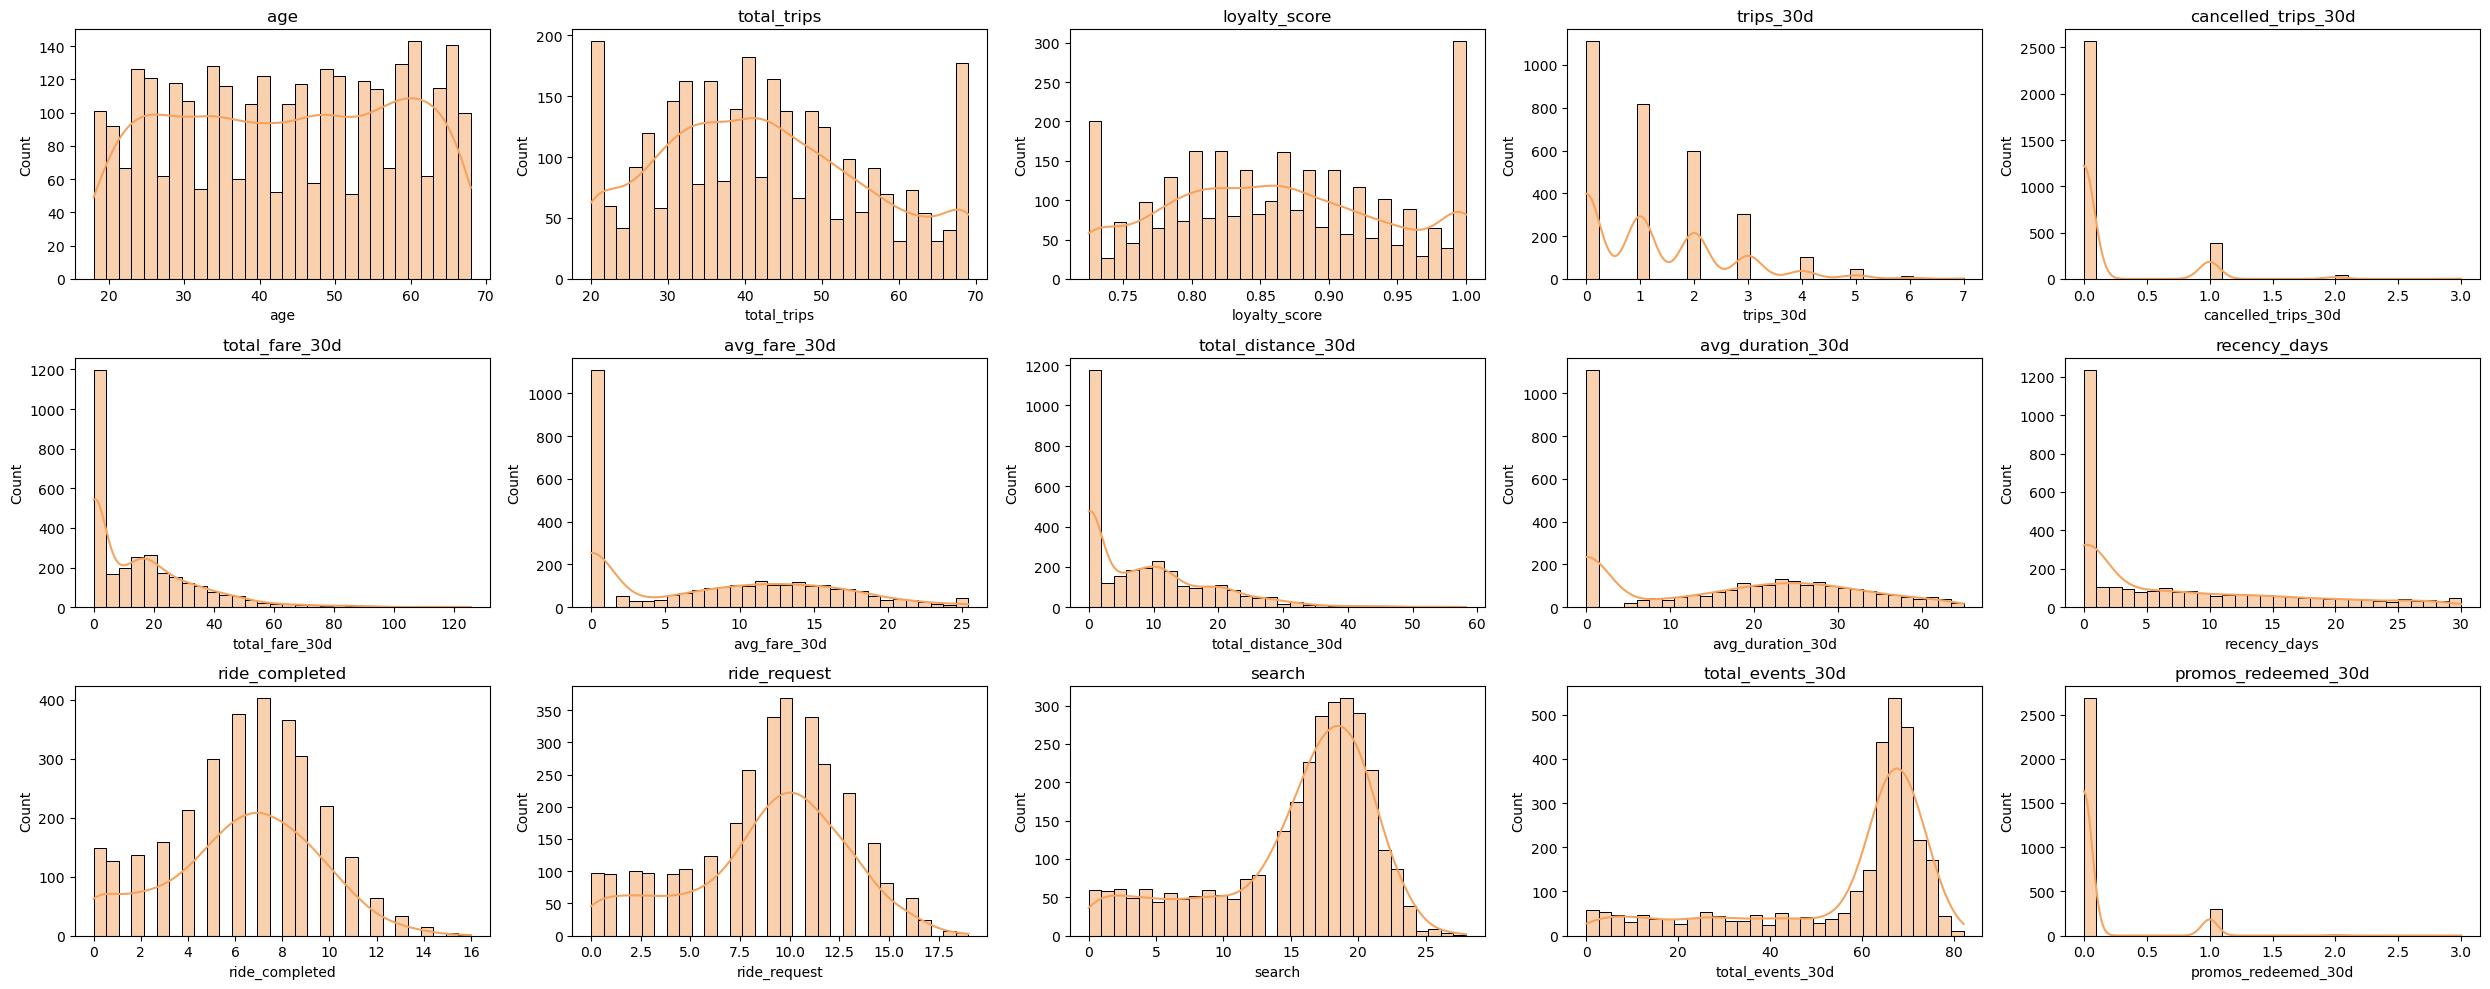

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(num_cols):
    sns.histplot(clustering_df[col], ax=ax[idx], color="Sandybrown", bins=30, kde=True)
    ax[idx].set_title(col)
    
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
clustering_df[num_cols] = scaler.fit_transform(clustering_df[num_cols])

In [12]:
clustering_df.head(3)

,city,age,gender,total_trips,loyalty_score,income_level,trips_30d,cancelled_trips_30d,total_fare_30d,avg_fare_30d,total_distance_30d,avg_duration_30d,recency_days,ride_completed,ride_request,search,total_events_30d,promos_redeemed_30d
0,3,-1.670584,2,1.514889,1.613269,0,-0.955737,-0.388289,-0.84313,-1.073321,-0.884215,-1.113457,-0.820106,-1.390034,1.010526,0.112067,0.277840,-0.332852
1,2,-1.193177,2,0.191242,0.223520,2,-0.955737,-0.388289,-0.84313,-1.073321,-0.884215,-1.113457,-0.820106,-1.071827,0.261433,0.608916,0.326205,-0.332852
2,4,0.102643,1,-1.058868,-1.080139,2,-0.955737,-0.388289,-0.84313,-1.073321,-0.884215,-1.113457,-0.820106,-0.117206,0.261433,0.277683,0.374569,-0.332852


#### Clustering

In [13]:
from sklearn.cluster import KMeans
import numpy as np

##### using elbow method

In [14]:
# error is called inertia or within-cluster sum of squares (WCSS)
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(clustering_df)
    inertia.append(model.inertia_)

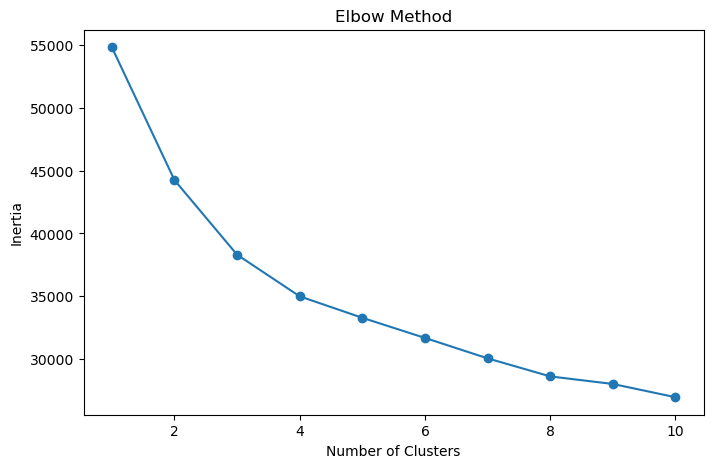

In [15]:
# Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

##### Silhouette Score

###### Silhouette score to reconfirm the number of cluster

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
# Compute silhouette scores
silhouette_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(clustering_df)
    silhouette_scores.append(silhouette_score(clustering_df, model.labels_))

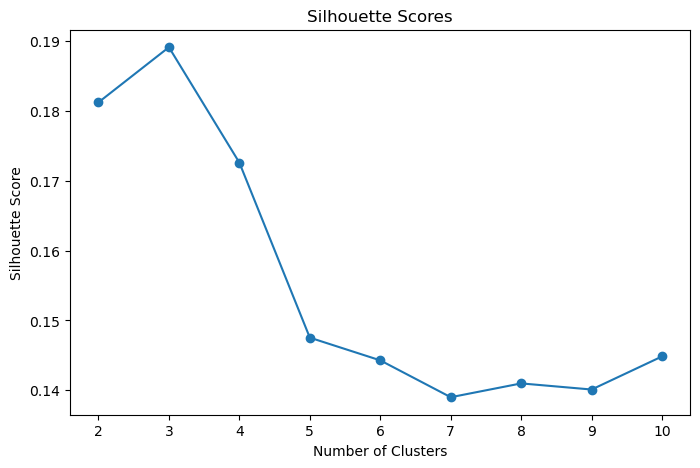

In [18]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


##### Apply K-Means Clustering

###### The optimal number of clusters is 3 (based on the above analysis).

In [19]:
# Apply K-Means clustering
optimal_k = 3
model = KMeans(n_clusters=optimal_k, random_state=42)

In [20]:
model.fit(clustering_df)

KMeans(n_clusters=3, random_state=42)

###### We will revert to using the raw data for assessment of the model

In [21]:
model.labels_

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

In [22]:
model_df['Cluster'] = model.labels_

In [23]:
model_df.head()

,customer_id,city,signup_date,age,gender,total_trips,cancelled_trips,days_since_last_trip,churned,engagement_score,...,recency_days,app_open,ride_completed,ride_request,search,total_events_30d,promos_redeemed_30d,promo_cost_30d,avg_discount_value_30d,Cluster
0,CUST00000,London,2023-04-04,19,Other,63,7,20,0,1.0,...,0.0,31.0,2.0,13.0,16.0,62.0,0.0,0.0,0.0,0
1,CUST00001,Berlin,2023-01-20,26,Other,45,0,44,0,1.0,...,0.0,31.0,3.0,10.0,19.0,63.0,0.0,0.0,0.0,0
2,CUST00002,Milan,2024-07-03,45,Male,28,1,4,0,1.0,...,0.0,31.0,6.0,10.0,17.0,64.0,0.0,0.0,0.0,0
3,CUST00003,Berlin,2025-03-16,32,Other,54,3,7,0,1.0,...,17.0,16.0,7.0,6.0,10.0,39.0,0.0,0.0,0.0,2
4,CUST00004,Milan,2024-04-19,44,Male,24,2,33,0,1.0,...,0.0,31.0,8.0,11.0,19.0,69.0,0.0,0.0,0.0,0


In [24]:
model_df.to_csv("../data/processed/model_clustered.csv", index=False)

#### Model Interpretation

###### Lets visualize relationships between key variables and the different clusters to interprete the model. Here we will use the raw data for visualizing the real properties

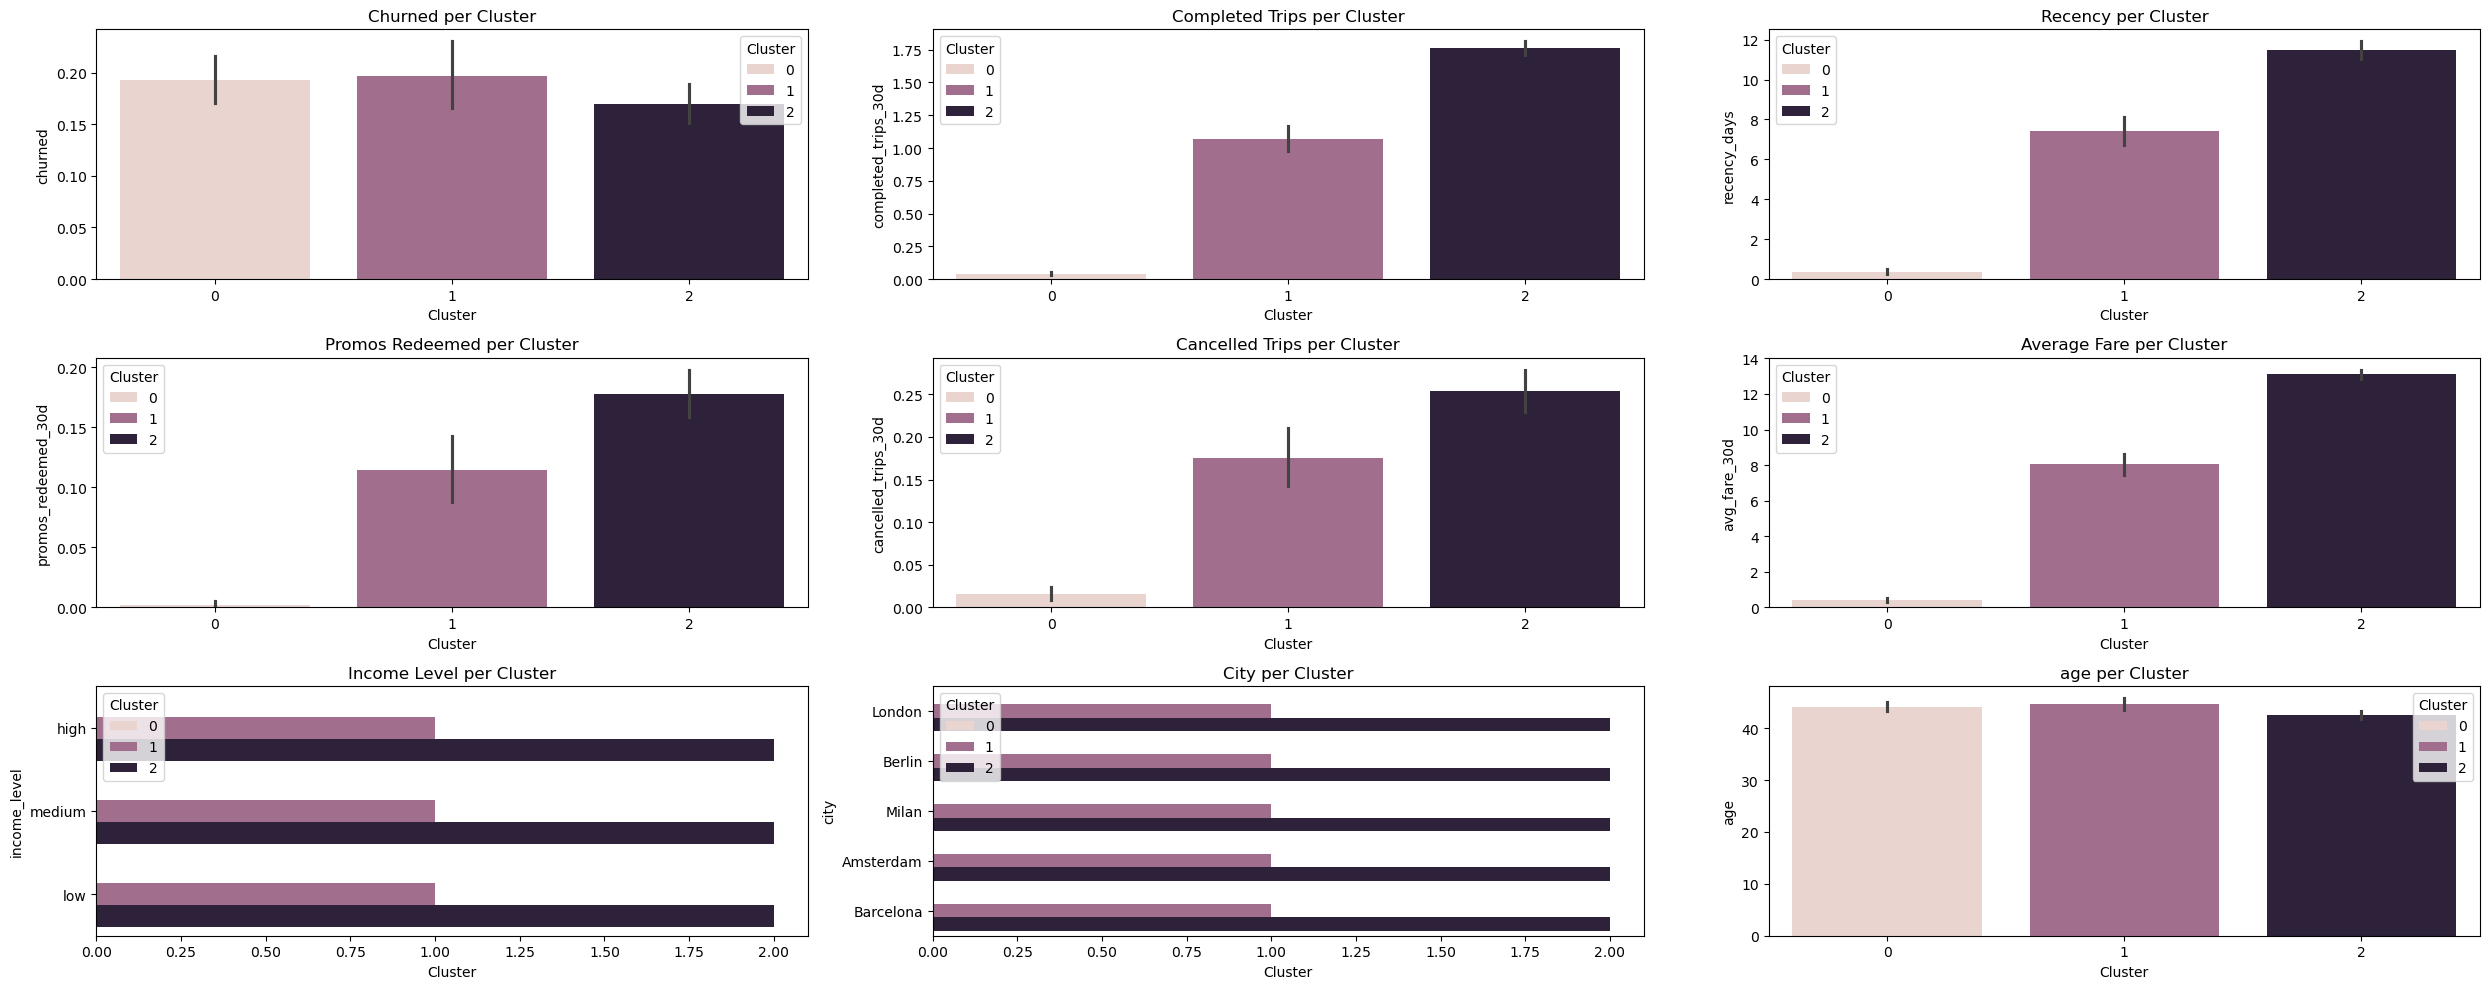

In [25]:
fig, ax =plt.subplots(nrows=3, ncols=3, figsize = (25,10))
ax=ax.flatten()

sns.barplot(x='Cluster', y='churned', hue="Cluster", data=model_df, ax=ax[0]) 
ax[0].set_title('Churned per Cluster')

sns.barplot(x='Cluster', y='completed_trips_30d', hue="Cluster", data=model_df, ax=ax[1])
ax[1].set_title('Completed Trips per Cluster')

sns.barplot(x='Cluster', y='recency_days',hue="Cluster",  data=model_df, ax=ax[2])
ax[2].set_title('Recency per Cluster')

sns.barplot(x='Cluster', y='promos_redeemed_30d',hue="Cluster",  data=model_df, ax=ax[3])
ax[3].set_title('Promos Redeemed per Cluster')

sns.barplot(x='Cluster', y='cancelled_trips_30d',hue="Cluster",  data=model_df, ax=ax[4])
ax[4].set_title('Cancelled Trips per Cluster')

sns.barplot(x='Cluster', y='avg_fare_30d',hue="Cluster",  data=model_df, ax=ax[5])
ax[5].set_title('Average Fare per Cluster')

sns.barplot(x='Cluster', y='income_level',hue="Cluster",  data=model_df, ax=ax[6])
ax[6].set_title('Income Level per Cluster')

sns.barplot(x='Cluster', y='city',hue="Cluster",  data=model_df, ax=ax[7])
ax[7].set_title('City per Cluster')

sns.barplot(x='Cluster', y='age',hue="Cluster",  data=model_df, ax=ax[8])
ax[8].set_title('age per Cluster')

plt.tight_layout()
plt.show()

**Cluster Profiles:**
- Cluster 0: This group represents customers with **lower overall spend and usage**, despite being relatively recent users. They tend to take **short-distance trips**, generate low revenue, and show **minimal reliance on promotions**. Income and city distribution are broad, indicating no strong demographic concentration (mid 40s).

- Cluster 1: This group consists of **mid-income, moderate-spending customers** who previously used the service regularly but are now showing **declining engagement**. They typically take **medium-distance trips**, often associated with routine or commuting behaviour, and are more exposed to **cancellations and friction** (mid to late 40s).

- Cluster 2: This group includes **higher-income, high-spending customers** who take **longer and more frequent trips**, often in major metropolitan cities. They generate the **highest revenue per customer** but also experience the **highest level of cancellations**, leading to elevated expectations around service quality (early 40s).

##### save models

In [26]:
import pickle
import os

In [27]:
# Save the trained model, scaler, and encoders

path = "../data/processes"
os.makedirs(path, exist_ok=True)

with open(f'{path}/kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open(f'{path}/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(f'{path}/label_encoders.pkl', 'wb') as encoders_file:
    pickle.dump(le, encoders_file)